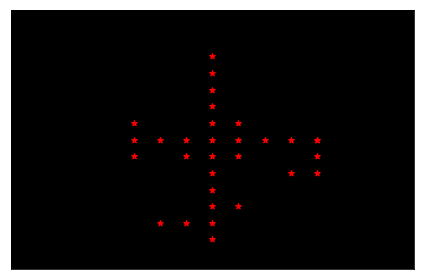

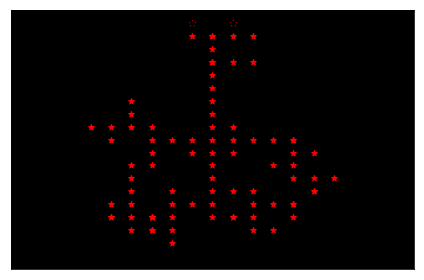

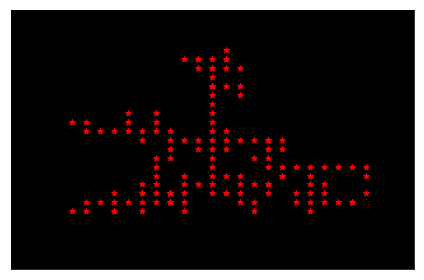

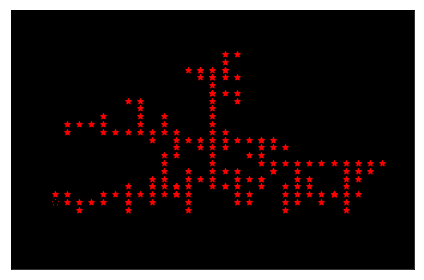

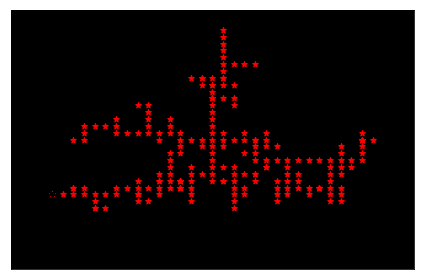

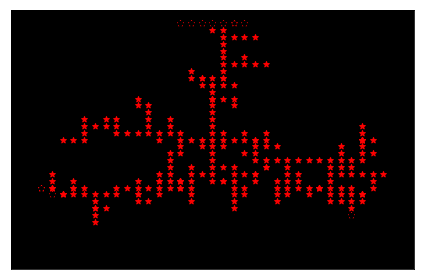

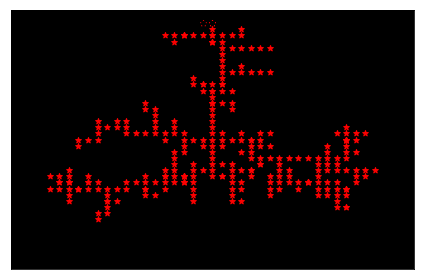

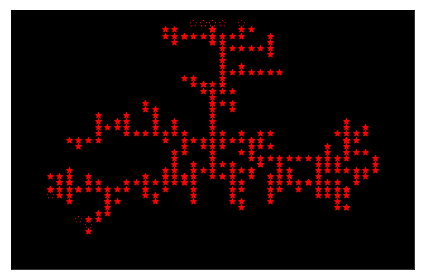

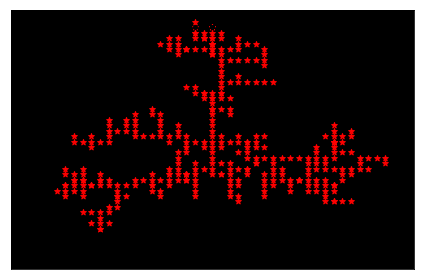

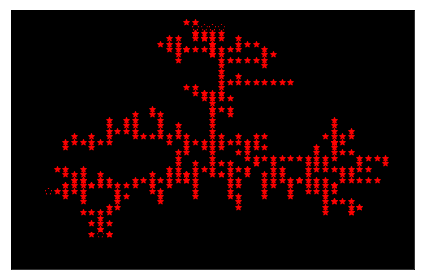

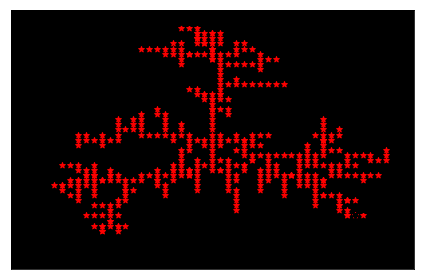

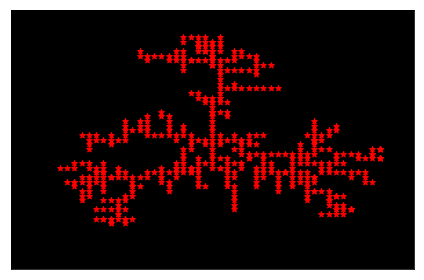

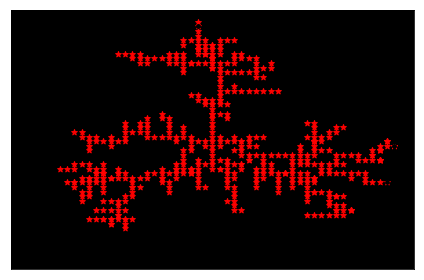

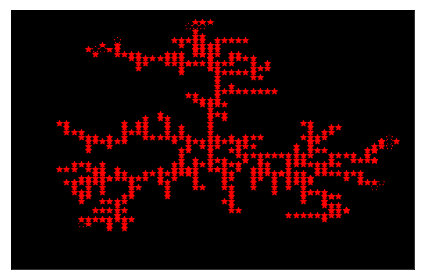

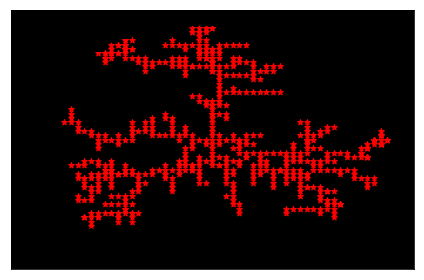

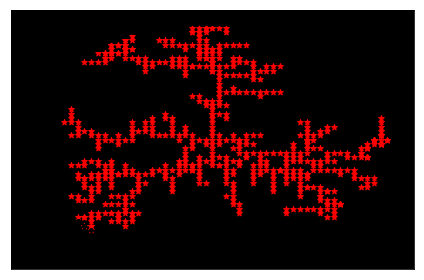

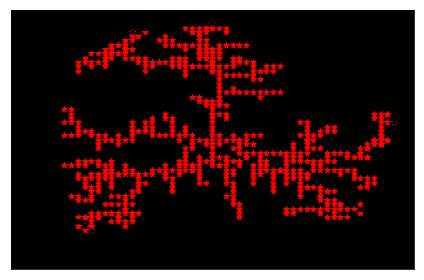

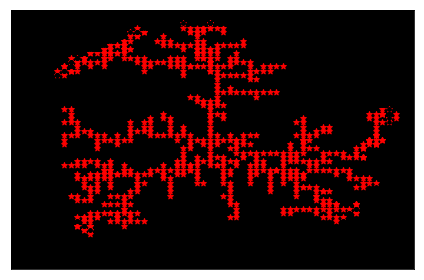

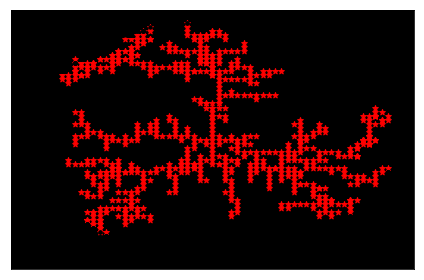

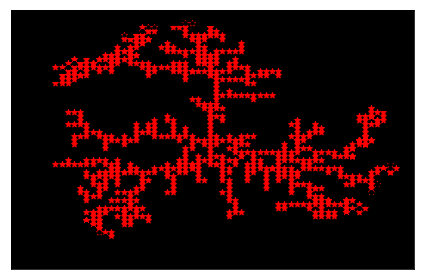

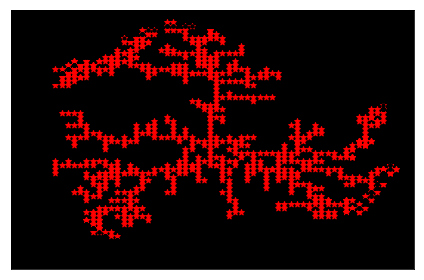

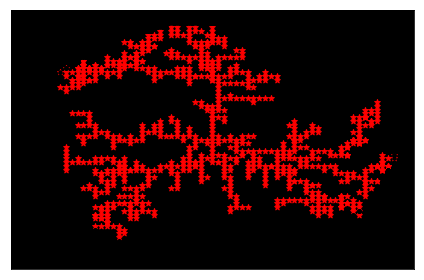

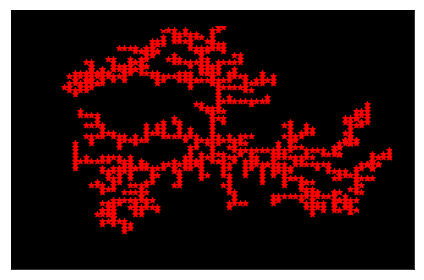

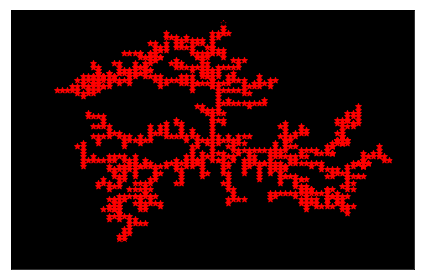

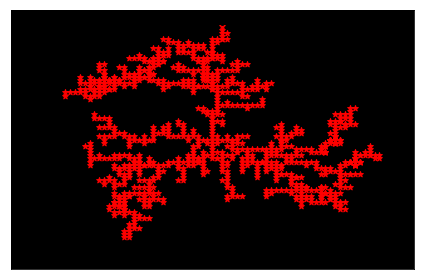

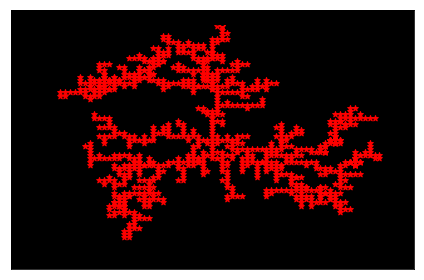

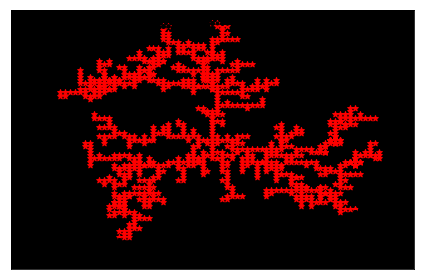

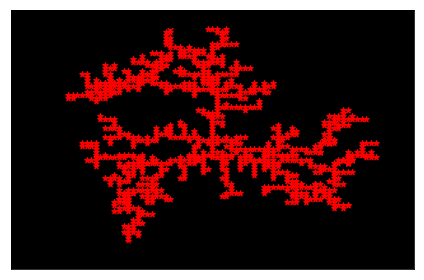

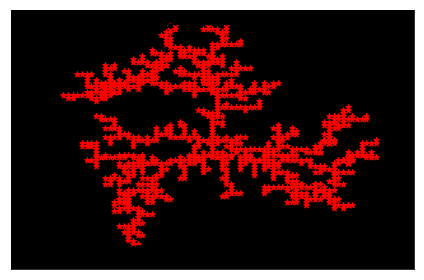

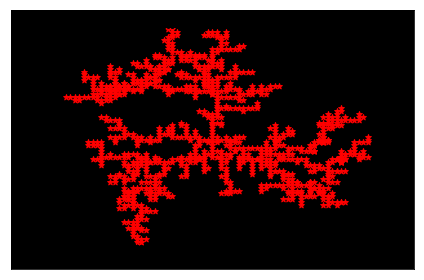

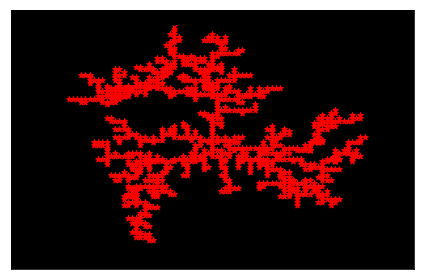

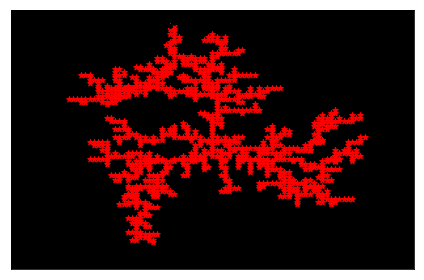

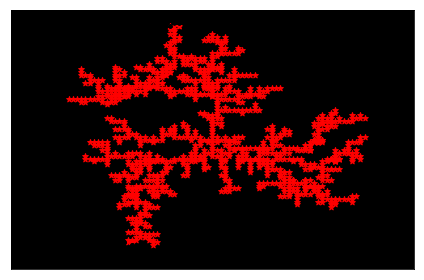

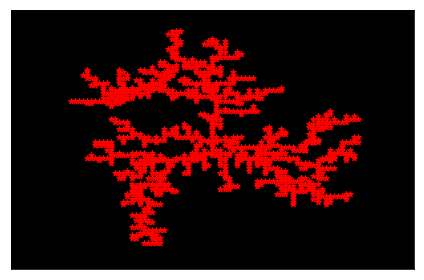

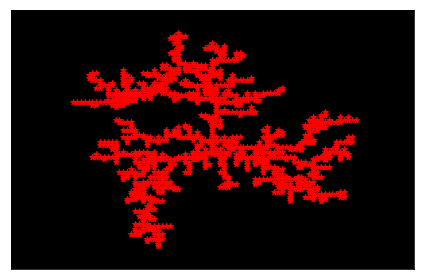

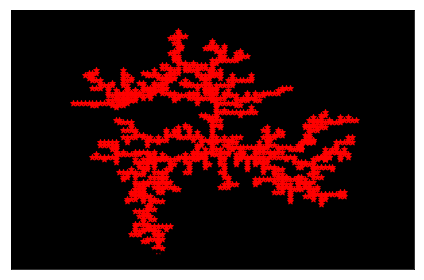

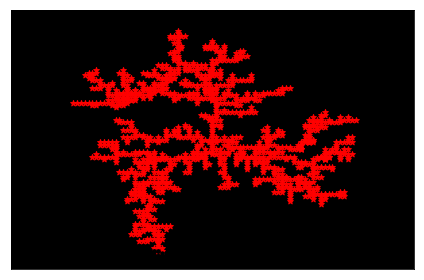

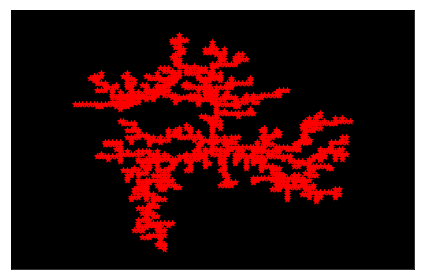

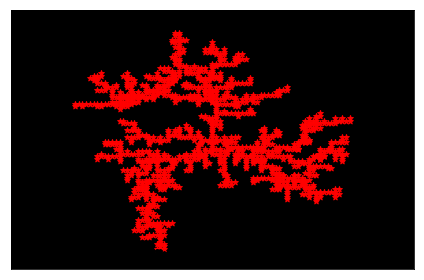

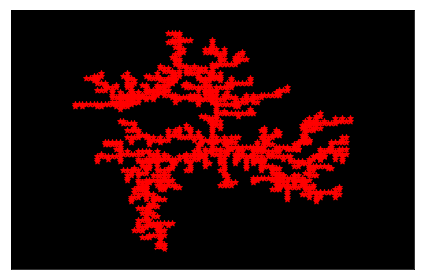

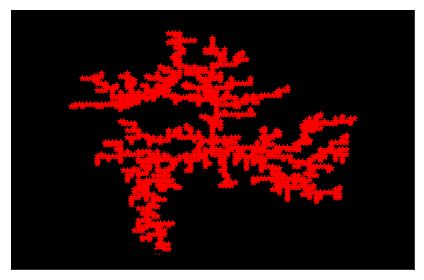

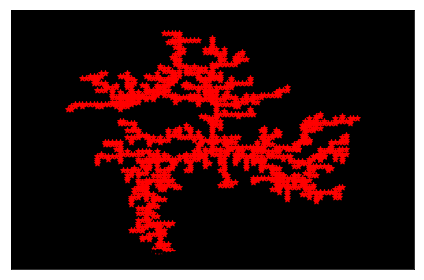

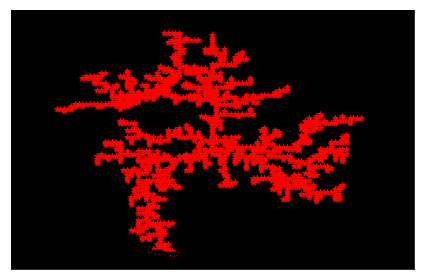

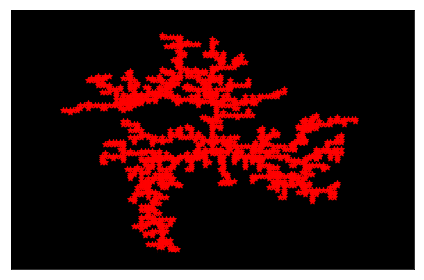

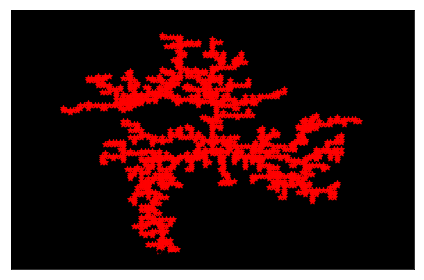

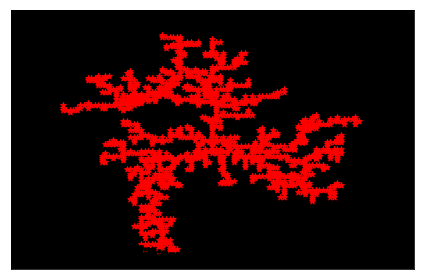

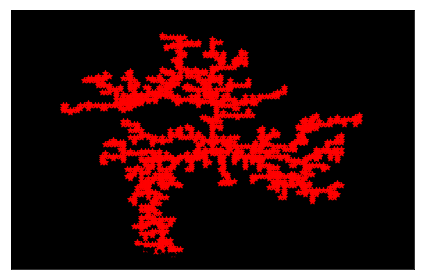

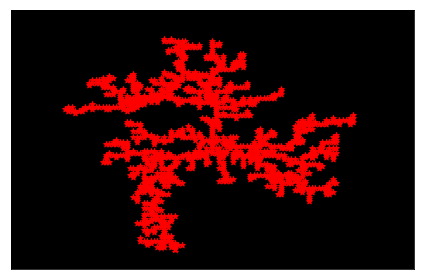

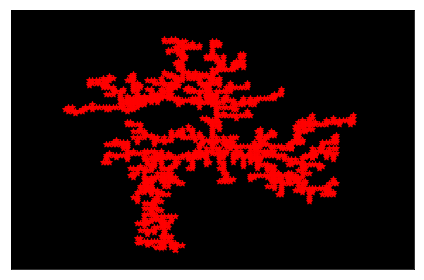

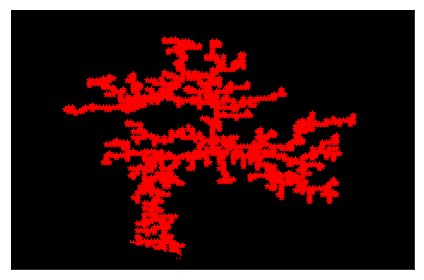

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import random as rd
import numpy as np
import math as m

def circle(r):
    '''Takes in radius and returns a random point of the circle
    with radius r'''
    sign = 10 * rd.random()
    if sign>=0 and sign<2.5:
        x2d = rd.randrange(-r, r+1)
        y2d = m.ceil(m.sqrt(r**2 - x2d**2))
    
    elif sign >=2.5 and sign <5:
        x2d = rd.randrange(-r, r+1)
        y2d = - m.ceil(m.sqrt(r**2 - x2d**2))
    
    elif sign>5 and sign<=7.5:
        y2d = - rd.randrange(-r, r+1)
        x2d = m.ceil(m.sqrt(r**2 - y2d**2))
    
    else:
        y2d = - rd.randrange(-r, r+1)
        x2d = - m.ceil(m.sqrt(r**2 - y2d**2))
    
    return [x2d, y2d]

S = np.zeros(frames)
fractal_number = 1

#intialize the problem
N = 5000
xdim, ydim = 500, 500
r = 5
dr = 2
grid2D = np.zeros([xdim, ydim])
first = [int(m.floor(len(grid2D)/2)), int(m.floor(len(grid2D)/2))]
list_of_connections = [first]
count = 0

#intialize the circle that the walkers start by 
#creating a list of 1000 points calling the circle function
inner_circle = [circle(r) for i in range(1000)]
for point1 in inner_circle:
    point1[0] += 250
    point1[1] += 250
inner_circle1 = pd.DataFrame(inner_circle)


#create the fractal
for j in range(1,N+2):
    rrr = []
    list_of_connections1 = pd.DataFrame(list_of_connections)

    #resize the circles when the fractal reaches the inner radius        
    if max(list_of_connections1[0]) - min(list_of_connections1[0]) >= 2*r - r/10\
    or max(list_of_connections1[1]) - min(list_of_connections1[1]) >= 2*r - r/10:
        r += 2
        inner_circle = [circle(r) for i in range(1000)]
        for point1 in inner_circle:
            point1[0] += 250
            point1[1] += 250
        inner_circle1 = pd.DataFrame(inner_circle)

    #intialize the walker  
    initx = rd.choice(inner_circle1[0])
    index = list(inner_circle1[0]).index(initx)
    [x2d, y2d] = [initx, inner_circle1[1][index]]


    #do the random walk
    while True:
        a = rd.random()
        if a>=0 and a<1/4: 
            x2d += 1                  #move RIGHT 25%
            rrr.append([x2d, y2d])
        elif a>=1/4 and a<2/4:
            x2d -= 1                  #move lEFT 25%
            rrr.append([x2d, y2d])
        elif a>=2/4 and a<3/4:
            y2d += 1                  #move  UP 25%
            rrr.append([x2d, y2d])
        else: 
            y2d -= 1                  #move DOWN 25%
            rrr.append([x2d, y2d])

        if (x2d-250)**2 + (y2d-250)**2 >= (r+dr)**2: break


            #check if the NEXT position is in the list of connections
            #and if it is then the walker has reached the crystal.
            #Keep the CURRENT position in the list of connections 
            #and break the loop
        if [x2d + 1, y2d] in list_of_connections:
                grid2D[x2d][y2d] = 1
                list_of_connections.append([x2d, y2d])
                break
        if [x2d - 1, y2d] in list_of_connections:
                grid2D[x2d][y2d] = 1
                list_of_connections.append([x2d, y2d])
                break
        if [x2d, y2d + 1] in list_of_connections:
                grid2D[x2d][y2d] = 1
                list_of_connections.append([x2d, y2d])
                break
        if [x2d, y2d - 1] in list_of_connections:
                grid2D[x2d][y2d] = 1
                list_of_connections.append([x2d, y2d])
                break


    if j%100 == 0:
        axx = plt.gca()
        axx.set_facecolor((0, 0, 0))

        rrr = pd.DataFrame(rrr)       
        plt.scatter(list_of_connections1[0], list_of_connections1[1], marker='*', c='r')
        plt.scatter(inner_circle1[0], inner_circle1[1], marker='.', c='k')
        plt.xticks([])
        plt.yticks([])    
        plt.tight_layout()
        plt.show()
        fractal_number += 1
        